In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB  

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (roc_auc_score, roc_curve, auc, confusion_matrix,
                            accuracy_score, classification_report, plot_confusion_matrix,
                            plot_precision_recall_curve, precision_recall_curve,plot_roc_curve)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

pd.set_option("display.max_columns",200)

%matplotlib inline

In [2]:
TRAIN_DATASET_PATH = 'course_project_train.csv'
TEST_DATASET_PATH = 'course_project_test.csv'

Загрузка данных

In [4]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [5]:
df_train.shape

(7500, 17)

In [6]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [7]:
df_test.shape

(2500, 16)

In [8]:
df_train.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

In [9]:
df_test.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
dtype: object

### Обзор данных <a class="anchor" id="review"></a>

**Обзор целевой переменной**

In [10]:
df_train['Credit Default'].value_counts(normalize=True)

0    0.718267
1    0.281733
Name: Credit Default, dtype: float64

**Обзор количественных признаков**

In [11]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


**Обзор номинативных/категориальных признаков**

In [12]:
for cat_colname in df_train.select_dtypes(include = ['object']).columns:
    print(str(cat_colname) + '\n\n' + str(df_train[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

### Обработка пропусков<a class="anchor" id="gaps"></a>

In [13]:
df_train.isnull().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [14]:
df_test.isnull().sum()

Home Ownership                     0
Annual Income                    513
Years in current job              86
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    1358
Bankruptcies                       3
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                     513
dtype: int64

In [15]:
df_train['Annual Income'] = df_train['Annual Income'].fillna(df_train['Annual Income'].mean())

In [16]:
df_train.isnull().sum()

Home Ownership                     0
Annual Income                      0
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

In [17]:
df_train['Months since last delinquent'] = df_train['Months since last delinquent'].fillna(df_train['Months since last delinquent'].mean())

In [18]:
df_train['Credit Score'] = df_train['Credit Score'].fillna(df_train['Credit Score'].mean())

In [19]:
df_train['Bankruptcies'] = df_train['Bankruptcies'].fillna(0)

In [20]:
df_train.isnull().sum()

Home Ownership                    0
Annual Income                     0
Years in current job            371
Tax Liens                         0
Number of Open Accounts           0
Years of Credit History           0
Maximum Open Credit               0
Number of Credit Problems         0
Months since last delinquent      0
Bankruptcies                      0
Purpose                           0
Term                              0
Current Loan Amount               0
Current Credit Balance            0
Monthly Debt                      0
Credit Score                      0
Credit Default                    0
dtype: int64

In [21]:
df_test['Annual Income'] = df_test['Annual Income'].fillna(df_test['Annual Income'].mean())
df_test['Months since last delinquent'] = df_test['Months since last delinquent'].fillna(df_test['Months since last delinquent'].mean())
df_test['Bankruptcies'] = df_test['Bankruptcies'].fillna(0)
df_test['Credit Score'] = df_test['Credit Score'].fillna(df_test['Credit Score'].mean())

In [22]:
df_test.isnull().sum()

Home Ownership                   0
Annual Income                    0
Years in current job            86
Tax Liens                        0
Number of Open Accounts          0
Years of Credit History          0
Maximum Open Credit              0
Number of Credit Problems        0
Months since last delinquent     0
Bankruptcies                     0
Purpose                          0
Term                             0
Current Loan Amount              0
Current Credit Balance           0
Monthly Debt                     0
Credit Score                     0
dtype: int64

**Посмотрим распределение**

In [23]:
def check_division(df, collumn_name):
    sns.distplot(df[collumn_name], fit=norm)

    mu, sigma = norm.fit(df[collumn_name])

    print(f'mu = {mu:.2f} and sigma = {sigma:.2f}')

    plt.legend(
        [f'Нормальное распределение. ($\mu=$ {mu:.2f} и $\sigma=$ {sigma:.2f} )'])
    plt.ylabel('Частота')
    plt.title(f'Распределение {collumn_name}')

    # QQ-plot
    fig = plt.figure()
    res = stats.probplot(df[collumn_name], plot=plt)

**Работа на последнем месте - преобразуем в цифровой параметр**

In [24]:
def year_in_current_job_str_to_num(df):
    values = df['Years in current job'].copy()
    for i in range(0,len(values)):
        if '+ years' in str(values[i]):
            values[i] = str(values[i]).replace('years', '')
        if 'years' in str(values[i]):
            values[i] = str(values[i]).replace('years', '')
        if '+' in str(values[i]):
            values[i] = str(values[i]).replace('+', '')
        if 'year' in str(values[i]):
            values[i] = str(values[i]).replace('year', '')
        if '< 1' in str(values[i]):
            values[i] = str(values[i]).replace('< 1', '0.5')
        df['Years in current job'][i] = values[i]
    
    
    df['Years in current job'] = pd.to_numeric(df['Years in current job'], downcast = 'unsigned')
        
    for i in range(0,len(values)):
        if df['Years in current job'][i] >= 10:
            df['Years in current job'][i] = random.randint(10,40)
    
    
    return df


**Убираем сильные выбросы по открытым кредитам**

In [25]:
def fix_open_credit(df):
    sigma = df['Maximum Open Credit'].std()
    max_mean = df['Maximum Open Credit'].mean()
    
    df.loc[df['Maximum Open Credit'] > (max_mean + 2 * sigma), 'Maximum Open Credit'] = max_mean
    
    return df

**Объединим похожие категории в назначении платежа**

In [26]:
def fix_purpose(df):
    df.loc[df['Purpose'] == 'take a trip', 'Purpose'] = 'vacation'
    df.loc[df['Purpose'] == 'renewable energy', 'Purpose'] = 'business loan'
    df.loc[df['Purpose'] == 'small business', 'Purpose'] = 'business loan'
    df.loc[df['Purpose'] == 'educational expenses', 'Purpose'] = 'major purchase'
    df.loc[df['Purpose'] == 'medical bills', 'Purpose'] = 'major purchase'
    df.loc[df['Purpose'] == 'wedding', 'Purpose'] = 'major purchase'
    df.loc[df['Purpose'] == 'moving', 'Purpose'] = 'other'
    
    return df

### Обработка выбросов<a class="anchor" id="gaps"></a>

In [27]:
df_train['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [28]:
df_train['Annual Income'].mean()

1366391.7201749636

In [29]:
df_train['Annual Income'].max()

10149344.0

In [30]:
df_train['Annual Income'].min()

164597.0

In [31]:
df_train['Annual Income'].std()

752481.2022069581

Разница между средним и максимальным значением параметра слишком большая -  максимальное значение в 10 раз больше, чем среднее, и в 100 раз больше, чем минимальное значение. Это либо какой то выброс, либо в выборку попали клиенты совершенно другого уровня, но для данной модели такие отклонения будут череваты снижением точности.

In [32]:
def fix_annual_income(df):
    mean_income = df['Annual Income'].mean()
    df['Annual Income'] = df['Annual Income'].fillna(mean_income)
    
    sigma = df['Annual Income'].std()
    df.loc[df['Annual Income'] > (mean_income + 3 * sigma), 'Annual Income'] = mean_income
    
    return df

In [33]:
df_train = fix_annual_income(df_train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu = 1301245.52 and sigma = 537468.70


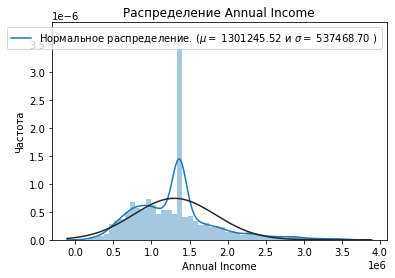

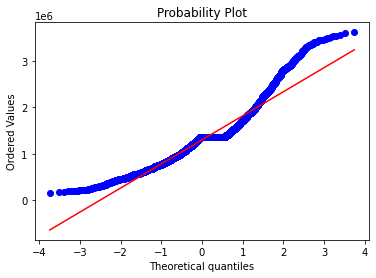

In [34]:
check_division(df_train, 'Annual Income')

Признак Years in current job

In [35]:
df_train['Years in current job'].head(4)

0          NaN
1    10+ years
2      8 years
3      6 years
Name: Years in current job, dtype: object

In [36]:
df_train['Years in current job'].unique()

array([nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

In [37]:
df_train['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [38]:
df_train['Years in current job']

0             NaN
1       10+ years
2         8 years
3         6 years
4         8 years
          ...    
7495     < 1 year
7496       1 year
7497      6 years
7498          NaN
7499      4 years
Name: Years in current job, Length: 7500, dtype: object

In [39]:
df_train = year_in_current_job_str_to_num(df_train)

<ipython-input-24-6632eae15bef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Years in current job'][i] = values[i]
<ipython-input-24-6632eae15bef>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Years in current job'][i] = random.randint(10,40)


In [40]:
def fix_years_in_current_job(df):
    year_mode = df['Years in current job'].mode().astype(str)[0]
    df['Years in current job'] = df['Years in current job'].fillna(year_mode)

    
    return df

In [41]:
df_train = fix_years_in_current_job(df_train)

Разбор Tax Liens

In [42]:
df_train['Tax Liens'].unique()

array([0., 3., 1., 2., 4., 6., 5., 7.])

In [43]:
df_train['Tax Liens'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Tax Liens, dtype: float64

Оставим признак в первоначальном виде

Разбор Number of Open Accounts

In [44]:
df_train['Number of Open Accounts'].unique()

array([11., 15.,  8., 13., 12.,  9., 17., 10.,  7.,  6., 14.,  3., 20.,
       19., 22., 18.,  5., 16.,  4.,  2., 23., 24., 21., 25., 32., 33.,
       31., 30., 29., 28., 26., 27., 43., 41., 34., 38., 35., 37., 42.])

In [45]:
df_train['Number of Open Accounts'].value_counts().sort_index()

2.0      28
3.0      95
4.0     212
5.0     325
6.0     504
7.0     613
8.0     638
9.0     728
10.0    677
11.0    692
12.0    562
13.0    465
14.0    420
15.0    313
16.0    265
17.0    232
18.0    143
19.0    139
20.0     93
21.0     78
22.0     49
23.0     59
24.0     50
25.0     32
26.0     12
27.0     14
28.0     14
29.0     10
30.0     11
31.0      6
32.0      6
33.0      6
34.0      2
35.0      1
37.0      2
38.0      1
41.0      1
42.0      1
43.0      1
Name: Number of Open Accounts, dtype: int64

Разбор years of Credit History

In [46]:
df_train['Years of Credit History'].unique()

array([26.3, 15.3, 35. , 22.5, 13.6, 14.6, 20.3, 12. , 15.7, 24.6, 11.5,
       17.6, 14. , 17.7, 18.4, 17.8, 28.5, 29. , 12.5, 26.5, 34.4, 28.3,
       14.8, 25. , 29.8, 15.8, 14.5, 19.5, 18.6, 20.5, 21. , 10.2, 31.4,
       18. ,  7.6, 23.7, 15. , 10.9,  9.4, 15.4, 21.4, 27.3, 18.7, 17. ,
       22.2, 10.4,  9.5, 19.2, 16.3, 21.2, 10.7, 17.3, 12.9, 16. , 16.6,
       15.6, 13.3, 11.3, 17.5, 13.1, 12.1, 32.5, 12.7,  9. , 18.1, 36.8,
       16.5, 16.4, 17.2, 32. , 19.4, 16.9, 17.9,  6.1, 11.4, 20.6,  8.9,
       39.6,  8.5, 18.8, 31.3, 22.4, 11.9, 23.9, 16.7, 13.8, 15.2,  8. ,
       23.8, 12.2,  6. ,  6.4,  9.8, 10.3, 21.7, 13.2, 33.6, 14.3, 19.1,
       14.1, 23. , 15.5, 20.4, 20.7, 20.1,  9.7,  7.8, 16.8, 20.8, 33.7,
       14.2, 20.2, 31.7, 25.5, 23.3, 21.1, 14.7, 24.5, 39.3, 34. ,  4.8,
        9.1, 10.1, 23.4,  9.9, 19.7, 10.5, 29.4, 30. , 19.9,  8.8, 10.6,
       26. , 20.9, 26.8, 10.8, 25.7, 40.3, 14.4, 31. , 21.5, 26.4, 23.6,
       10. ,  9.6, 21.8, 23.1, 38.7, 26.6, 11.8, 24

In [47]:
df_train['Number of Open Accounts'].value_counts().sort_index()

2.0      28
3.0      95
4.0     212
5.0     325
6.0     504
7.0     613
8.0     638
9.0     728
10.0    677
11.0    692
12.0    562
13.0    465
14.0    420
15.0    313
16.0    265
17.0    232
18.0    143
19.0    139
20.0     93
21.0     78
22.0     49
23.0     59
24.0     50
25.0     32
26.0     12
27.0     14
28.0     14
29.0     10
30.0     11
31.0      6
32.0      6
33.0      6
34.0      2
35.0      1
37.0      2
38.0      1
41.0      1
42.0      1
43.0      1
Name: Number of Open Accounts, dtype: int64

Разбор Maximum Open Credit

In [48]:
df_train['Maximum Open Credit'].value_counts().sort_index()

0.000000e+00    65
4.334000e+03     1
6.556000e+03     1
6.622000e+03     1
1.089000e+04     1
                ..
4.092389e+07     1
5.756256e+07     1
2.655129e+08     1
3.800523e+08     1
1.304726e+09     1
Name: Maximum Open Credit, Length: 6963, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu = 945153.73 and sigma = 16025148.22


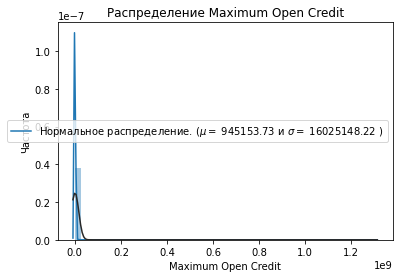

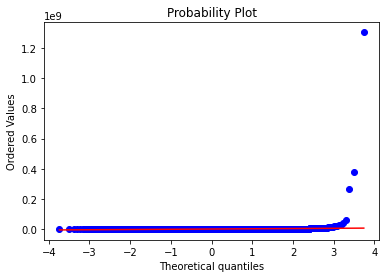

In [49]:
check_division(df_train, 'Maximum Open Credit')

In [50]:
df_train['Maximum Open Credit'].max()

1304726170.0

In [51]:
df_train = fix_open_credit(df_train)

Разбор Number of Credit Problems - количество проблем с кредитом

In [52]:
df_train['Number of Credit Problems'].value_counts().sort_index()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

Разбор Months since last delinquent - количество месяцев с последней просрочки платежа

In [53]:
df_train['Months since last delinquent'].value_counts().sort_index()

0.0      18
1.0      26
2.0      25
3.0      30
4.0      31
         ..
84.0      1
86.0      1
91.0      1
92.0      1
118.0     1
Name: Months since last delinquent, Length: 90, dtype: int64

Разбор по Bankruptcies

In [54]:
df_train['Bankruptcies'].value_counts()

0.0    6674
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

Разбор Purpose - цель кредита

In [55]:
df_train['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

Можно объединить похожие категории

In [56]:
def fix_purpose(df):
    df.loc[df['Purpose'] == 'take a trip', 'Purpose'] = 'vacation'
    df.loc[df['Purpose'] == 'renewable energy', 'Purpose'] = 'business loan'
    df.loc[df['Purpose'] == 'small business', 'Purpose'] = 'business loan'
    df.loc[df['Purpose'] == 'educational expenses', 'Purpose'] = 'major purchase'
    df.loc[df['Purpose'] == 'medical bills', 'Purpose'] = 'major purchase'
    df.loc[df['Purpose'] == 'wedding', 'Purpose'] = 'major purchase'
    df.loc[df['Purpose'] == 'moving', 'Purpose'] = 'other'
    
    return df

In [57]:
df_train = fix_purpose(df_train)

Рассмотрим Term

In [58]:
df_train['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

Рассмотрим Current Loan Amount

In [59]:
df_train['Current Loan Amount'].value_counts()

99999999.0    870
89298.0         6
218064.0        6
216106.0        5
270226.0        5
             ... 
490006.0        1
404756.0        1
194414.0        1
420376.0        1
33792.0         1
Name: Current Loan Amount, Length: 5386, dtype: int64

Введем новый параметр

In [60]:
def new_feature(df):
    df['month_income'] = df['Annual Income'] / 12
    df['left_after_pay'] =  df['month_income'] - df['Monthly Debt']
    
    df.loc[(df['Current Credit Balance'] - df['Current Loan Amount'] ) < 0, 'Current Credit Balance'] = df['Current Loan Amount']
    df['how_much_used_credit_balance'] =   df['Current Credit Balance'] / df['Current Credit Balance'] * 100
    
    return df

In [62]:
df_train = new_feature(df_train)

### Обучение модели<a class="anchor" id="gaps"></a>

In [63]:
df_train.columns

Index(['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default', 'month_income', 'left_after_pay',
       'how_much_used_credit_balance'],
      dtype='object')

In [64]:
df_train['Years in current job'] = df_train['Years in current job'].astype('float')

### Random Forest

In [65]:
df_train_1 = df_train.loc[df_train['Credit Default'] == 1]
df_train_2 = df_train.append(df_train_1)
df_train_2 = df_train_2.reset_index(drop=True)

In [67]:
features = list(df_train_2.loc[:, (df_train_2.columns != 'Id')].corrwith(
    df_train_2['Credit Default']).abs().sort_values(ascending=False)[1:].index)

target = 'Credit Default'

X = df_train_2[features]
y = df_train_2[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=2)
X_train.shape, X_test.shape

((6729, 16), (2884, 16))

In [71]:
MOD = RandomForestClassifier(max_depth=25, max_features=0.2, min_samples_split=5,
                       n_estimators=440, oob_score=True)

m_params = [
             {
                     "n_estimators" : range(1,500),  
                     "max_depth": range(1,30), 
                     "min_samples_split": range(1,50),  
                     "max_features": ["sqrt", "log2", 10, 20, None],
                     "oob_score": [True],
                     "bootstrap": [True]
                     }
 ]

scoreFunction = {"recall": "recall", "precision": "precision"}

random_search = RandomizedSearchCV(MOD,
                                        m_params,
                                        n_iter = 20,
                                        scoring = scoreFunction,               
                                        refit = "recall",
                                        return_train_score = True,
                                        random_state = 42,
                                        cv = 5) 

MOD.fit(X_train, y_train)

random_search.fit(X_train, y_train)

MOD = random_search.best_estimator_


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

In [72]:
MOD_pred_test = MOD.predict(X_test)

In [73]:
random_search.best_estimator_
RandomForestClassifier(max_depth=25, max_features=0.2, min_samples_split=5,
                        n_estimators=440, oob_score=True)

RandomForestClassifier(max_depth=25, max_features=0.2, min_samples_split=5,
                       n_estimators=440, oob_score=True)

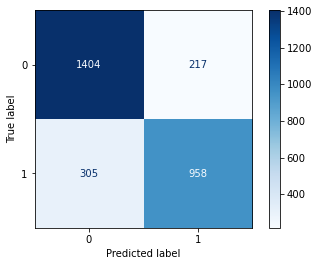

In [74]:
plot_confusion_matrix(MOD, X_test, y_test, cmap=plt.cm.Blues);

In [75]:
print(classification_report(y_test, MOD_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1621
           1       0.82      0.76      0.79      1263

    accuracy                           0.82      2884
   macro avg       0.82      0.81      0.81      2884
weighted avg       0.82      0.82      0.82      2884



In [77]:
proba = MOD.predict_proba(X_test)
proba[:5]

array([[0.38424046, 0.61575954],
       [0.508269  , 0.491731  ],
       [0.66149112, 0.33850888],
       [0.78435532, 0.21564468],
       [0.67307167, 0.32692833]])

<AxesSubplot:>

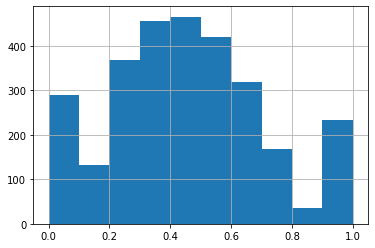

In [78]:
pd.Series(proba[:,1]).hist()

In [79]:
MOD_pred_test = np.where(proba[:,1] >= 0.6, 1, 0)

In [80]:
print(classification_report(y_test, MOD_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83      1621
           1       0.91      0.55      0.68      1263

    accuracy                           0.78      2884
   macro avg       0.82      0.75      0.76      2884
weighted avg       0.81      0.78      0.77      2884



In [96]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df_test.columns:
    if df_test[column_name].dtype == object:
        df_test[column_name] = le.fit_transform(df_test[column_name].astype(str))
    else:
        pass

In [97]:
proba = MOD.predict_proba(df_test)

In [98]:
proba.max()

0.75

In [99]:
proba.min()

0.24999999999999997

In [100]:
m = stats.mode(proba)
m1 = m[0][0]
m1[1]

0.4501651126651126

<AxesSubplot:>

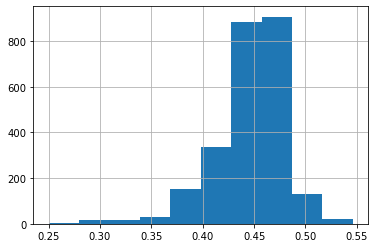

In [101]:
pd.Series(proba[:,1]).hist()

In [102]:
MOD_pred_test = np.where(proba[:,1] >= (m1[1]), 0, 1)

In [104]:
df_test['Credit Default'] = MOD_pred_test
df_test['Credit Default'].value_counts()

0    1402
1    1098
Name: Credit Default, dtype: int64